In [1]:
!gdown --id 1llAaH4D_zDgwyvIsMdR45SMOtrSGl43p

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1llAaH4D_zDgwyvIsMdR45SMOtrSGl43p
From (redirected): https://drive.google.com/uc?id=1llAaH4D_zDgwyvIsMdR45SMOtrSGl43p&confirm=t&uuid=bbb2f421-4417-45f7-8a26-273b0f50cba9
To: /kaggle/working/CLEANED_IMAGES.rar
100%|████████████████████████████████████████| 132M/132M [00:01<00:00, 79.8MB/s]


In [2]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [3]:
!apt-get install unrar

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 132 not upgraded.


In [6]:
!unrar x "CLEANED_IMAGES.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from CLEANED_IMAGES.rar

Creating    CLEANED_IMAGES                                            OK
Creating    CLEANED_IMAGES/7A B                                       OK
Extracting  CLEANED_IMAGES/7A B/ahcr_00001_haa_start_18_haab.jpg         0  OK 
Extracting  CLEANED_IMAGES/7A B/ahcr_00001_haa_start_19_haab.jpg         0  OK 
Extracting  CLEANED_IMAGES/7A B/ahcr_00001_haa_start_26_haab.jpg         0  OK 
Extracting  CLEANED_IMAGES/7A B/ahcr_00001_haa_start_27_haab.jpg         0  OK 
Extracting  CLEANED_IMAGES/7A B/ahcr_00002_haa_start_18_haab.jpg         0  OK 
Extracting  CLEANED_IMAGES/7A B/ahcr_00002_haa_start_19_haab.jpg         0  OK 
Extracting  CLEANED_IMAGES/7A B/ahcr_00002_haa_start_26_haab.jpg         0  OK 
Extracting  CLEANED_IMAGES/7A B/ahcr_00002_haa_start_27_haab.jpg         0  OK 
Extracting  CLEANED_IMAGES/7A B/ahcr_00003_haa_start_18_haab.jpg         0  OK 
Extracting  CLEANED_IM

In [57]:
BATCH_SIZE = 3
IMAGE_SIZE = 128
CHANNELS=3
EPOCHS=7

In [16]:
import tensorflow as tf
from keras import  models , layers
import matplotlib.pyplot as plt
import keras

In [17]:
data = keras.preprocessing.image_dataset_from_directory(
    "CLEANED_IMAGES",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 86378 files belonging to 84 classes.


In [18]:
def train_test_split(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=11)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [19]:
train , validation , test = train_test_split(data)

In [20]:
len(validation)


2879

In [21]:
train_ = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation = validation.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [22]:
resize_and_rescale = keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [61]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # (128, 128, 3)

model = models.Sequential([
    layers.Input(shape=input_shape),  # No batch size specified
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(84, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(84, activation='softmax'),
])


In [62]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [63]:
history = model.fit(
    train , 
    batch_size=132,# Ensure the batch size is specified here
    validation_data=validation,
    epochs=EPOCHS
)


Epoch 1/7
23034/23034 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.4324 - loss: 2.1650 - val_accuracy: 0.8425 - val_loss: 0.5183
Epoch 2/7
23034/23034 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - accuracy: 0.7943 - loss: 0.6754 - val_accuracy: 0.8706 - val_loss: 0.4161
Epoch 3/7
23034/23034 ━━━━━━━━━━━━━━━━━━━━ 74s 3ms/step - accuracy: 0.8374 - loss: 0.5432 - val_accuracy: 0.8842 - val_loss: 0.3721
Epoch 4/7
23034/23034 ━━━━━━━━━━━━━━━━━━━━ 74s 3ms/step - accuracy: 0.8542 - loss: 0.4888 - val_accuracy: 0.8978 - val_loss: 0.3399
Epoch 5/7
23034/23034 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - accuracy: 0.8570 - loss: 0.4765 - val_accuracy: 0.9014 - val_loss: 0.3306
Epoch 6/7
23034/23034 ━━━━━━━━━━━━━━━━━━━━ 74s 3ms/step - accuracy: 0.8648 - loss: 0.4580 - val_accuracy: 0.9001 - val_loss: 0.3313
Epoch 7/7
23034/23034 ━━━━━━━━━━━━━━━━━━━━ 74s 3ms/step - accuracy: 0.8648 - loss: 0.4502 - val_accuracy: 0.9004 - val_loss: 0.3265


In [64]:
scores = model.evaluate(test)

2880/2880 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8945 - loss: 0.3394


In [65]:
len(test)

2880

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

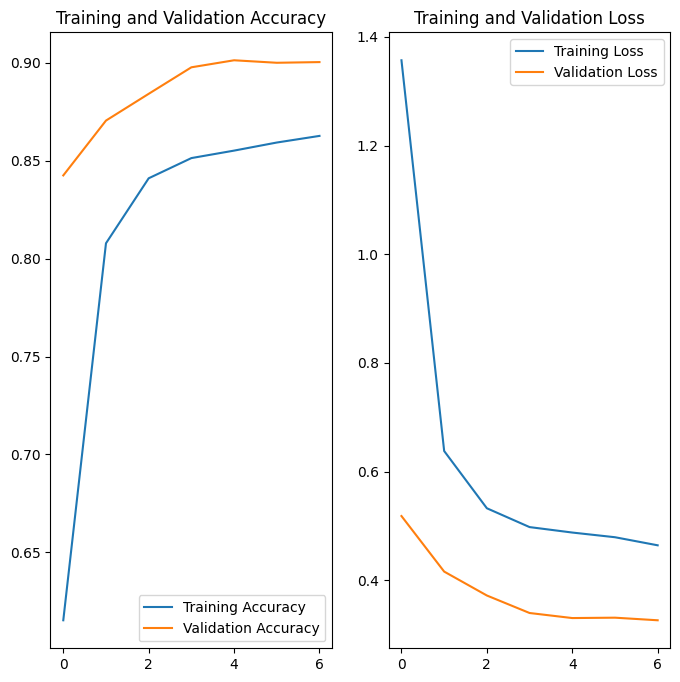

In [67]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
class_names = data.class_names

first image to predict
actual label: Faa_M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted label: Faa_M


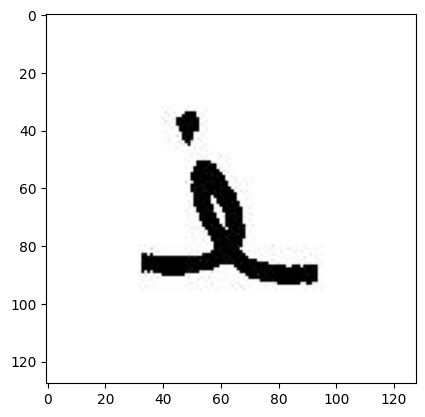

In [56]:
import numpy as np
for images_batch, labels_batch in test.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = []
predictions = []

for images, labels in test:
    true_labels.extend(labels.numpy())  # Append true labels to the list
    pred = model.predict(images)
    predictions.extend(np.argmax(pred, axis=1))  # Get the predicted class

true_labels = np.array(true_labels)
predictions = np.array(predictions)

# C

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

In [44]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels, predictions)


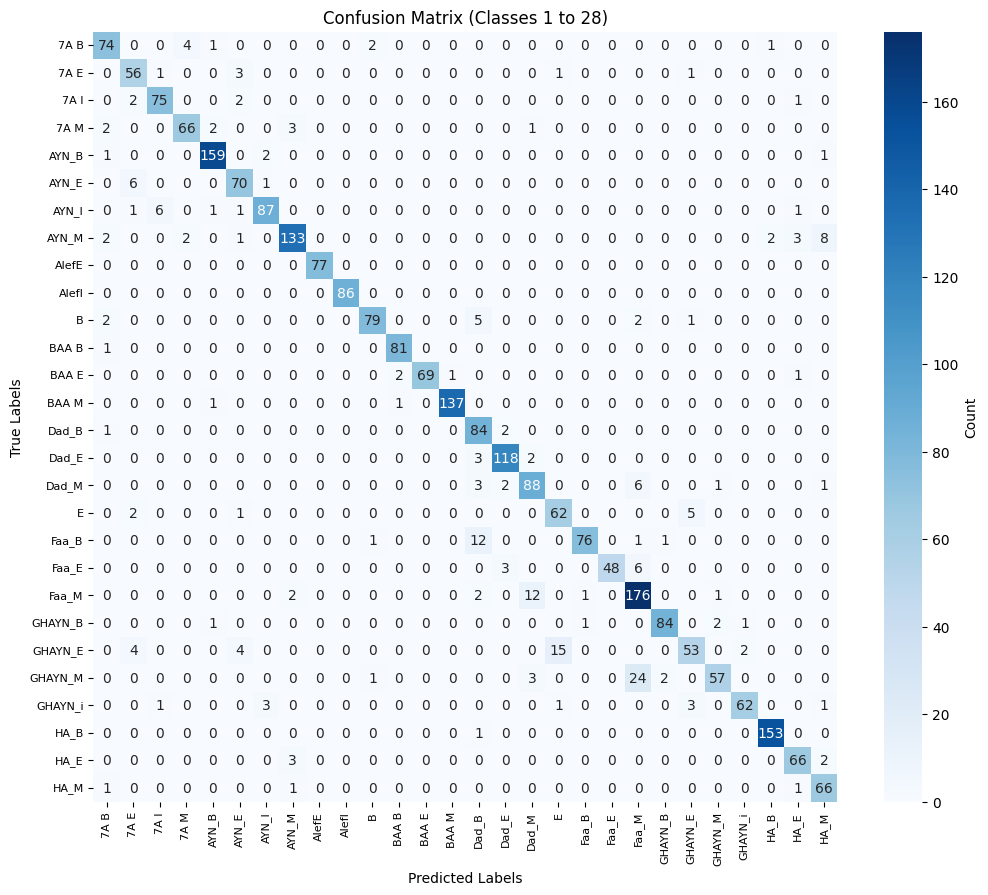

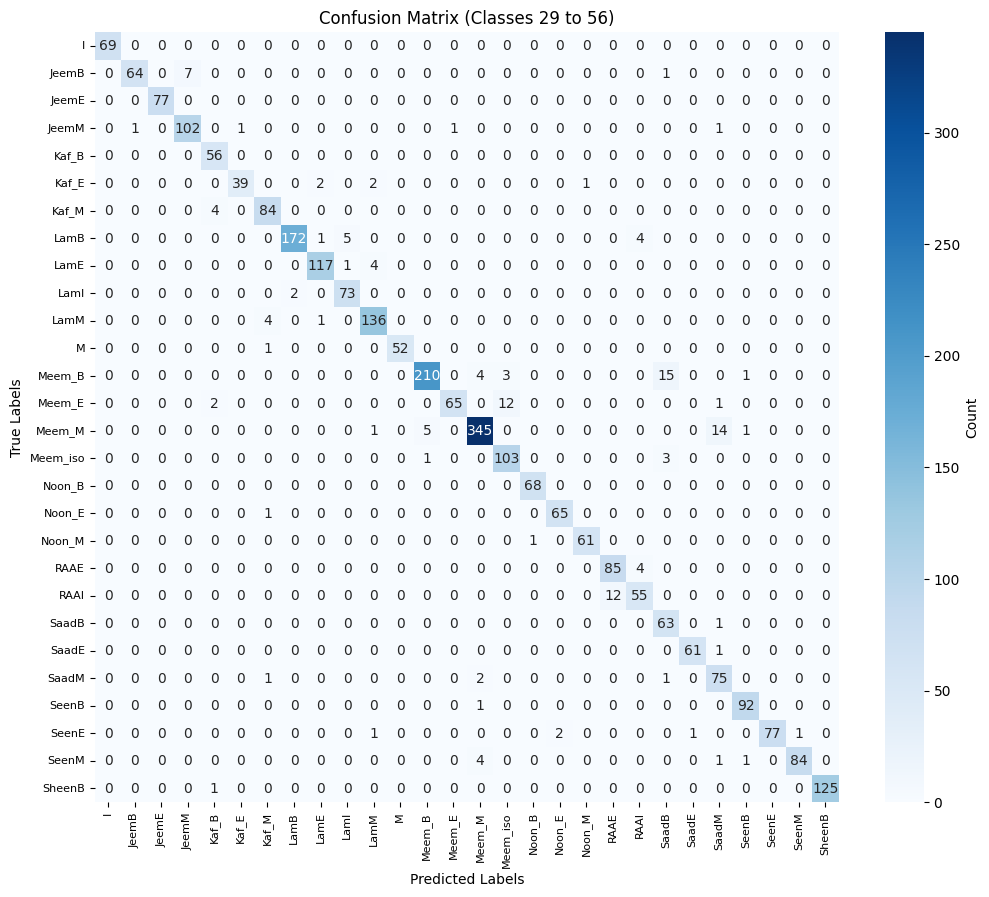

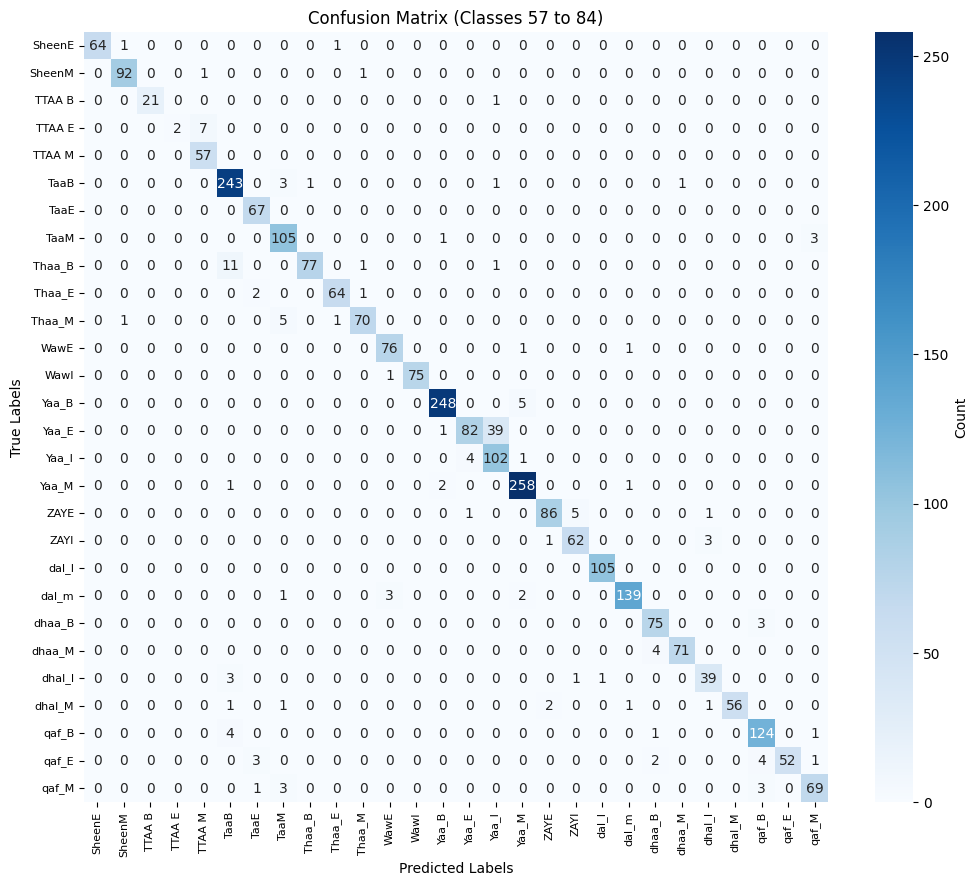

In [48]:
# Function to plot sub-matrices
def plot_confusion_matrix(cm, class_names, start_idx, end_idx):
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm[start_idx:end_idx, start_idx:end_idx], annot=True, fmt='g', cmap='Blues',
                xticklabels=class_names[start_idx:end_idx], yticklabels=class_names[start_idx:end_idx],
                cbar_kws={'label': 'Count'})
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (Classes {start_idx+1} to {end_idx})')
    plt.show()

# Example: Split the confusion matrix into chunks (e.g., classes 0-28, 29-57, 58-84)
num_classes = len(class_names)
chunk_size = 28

for i in range(0, num_classes, chunk_size):
    plot_confusion_matrix(cm, class_names, i, min(i + chunk_size, num_classes))
